# Set up

In [ ]:
# !pip install underthesea

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from underthesea import word_tokenize
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

## Module

In [ ]:
def encoder(sentence):
    words=word_tokenize(sentence)
    onehot_vector=np.zeros(len(dictionary))
    for w in words:
        for i,word in enumerate(dictionary):
            if word==w:
                onehot_vector[i]+=1
    return onehot_vector

## Load and analyze assets

In [ ]:
with open('dictionary.txt', 'r') as f:
    dictionary = [line.rstrip('\n') for line in f]

In [ ]:
df = pd.read_csv('data_7848.csv')

In [ ]:
df['khach_cmt'] = df['khach_cmt'].astype(str)
df['rating'] = df['rating'].astype(int)
df.duplicated().value_counts()

False    7848
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   khach_cmt  7848 non-null   object
 1   rating     7848 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 122.8+ KB


In [ ]:
df['rating'].value_counts()

1    1570
2    1570
5    1570
3    1569
4    1569
Name: rating, dtype: int64

In [ ]:
df.columns

Index(['khach_cmt', 'rating'], dtype='object')

# Prepare Data

In [ ]:
df["encode"] = df.apply(lambda row: encoder(row['khach_cmt']), axis=1)

In [ ]:
X = np.array(df['encode'].to_list())
y = np.array(df['rating'].to_list())
del(df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6278, 4113), (1570, 4113), (6278,), (1570,))

# Model

In [ ]:
def evaluation_model(model,X_train,X_test,y_train,y_test):
  y_pred=model.predict(X_train)
  print("accuracy score of train set: {:.2f}".format(accuracy_score(y_train,y_pred)))
  # plot
  plt.figure(figsize=(8,6))
  sns.heatmap(confusion_matrix(y_train,y_pred),cmap="YlGnBu")
  plt.show()

  print("\n===========================\n")

  y_pred=model.predict(X_test)
  print("accuracy score of test set: {:.2f}".format(accuracy_score(y_test,y_pred)))
  confusion_matrix(y_test,y_pred)
  # plot
  plt.figure(figsize=(8,6))
  sns.heatmap(confusion_matrix(y_test,y_pred),cmap="YlGnBu")
  plt.show()

## KNeighborsClassifier

In [ ]:
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(X_train,y_train)

KNeighborsClassifier()

accuracy score of train set: 0.60


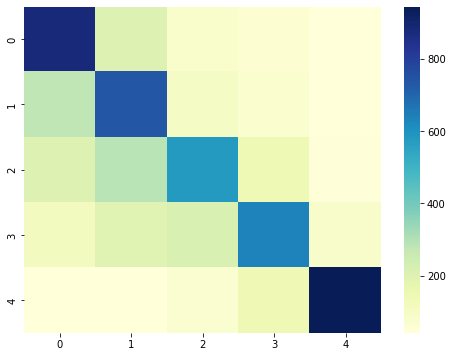



accuracy score of test set: 0.39


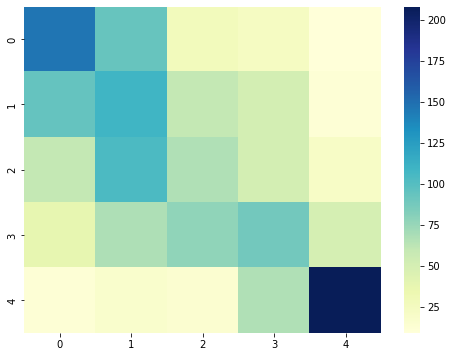

In [ ]:
evaluation_model(modelKNN,X_train,X_test,y_train,y_test)

## DecisionTreeClassifier

In [ ]:
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train,y_train)

DecisionTreeClassifier()

accuracy score of train set: 0.98


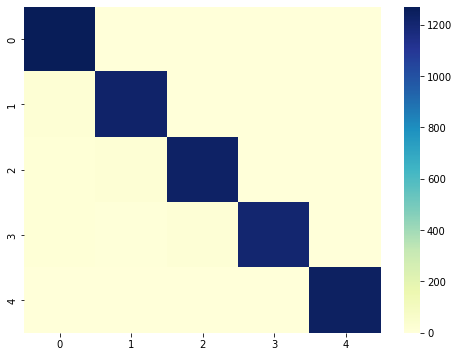



accuracy score of test set: 0.41


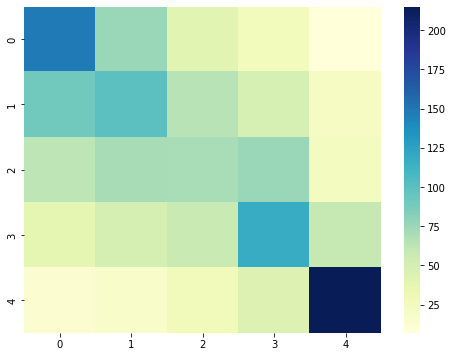

In [ ]:
evaluation_model(modelDT,X_train,X_test,y_train,y_test)

## RandomForestClassifier

In [ ]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train,y_train)

RandomForestClassifier()

accuracy score of train set: 0.98


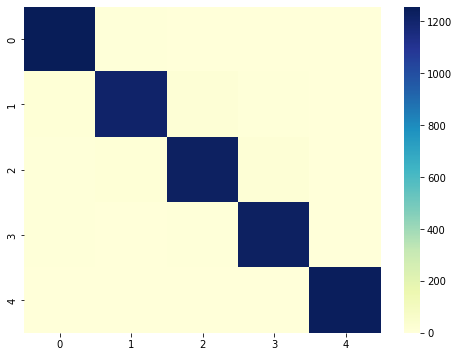



accuracy score of test set: 0.51


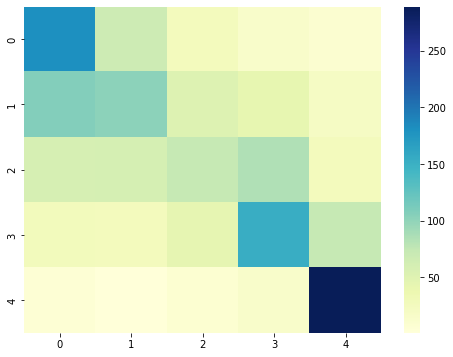

In [ ]:
evaluation_model(modelRF,X_train,X_test,y_train,y_test)

## Deep Neural Network

*Small dataset, Free server with weak configuration --> inefficient*

# Conclusion

In [ ]:
def doan_xem(model,comment):
  return model.predict(encoder(comment).reshape(1,-1))


1.   modelKNN
2.   modelDT
3.   modelRF



In [ ]:
cmt = 'đồ đẹp'
print('rating: {}'.format(doan_xem(modelKNN,cmt)[0]))

rating: 5


In [ ]:
pickle.dump(modelKNN, open('knn.txt', 'wb'))  

In [ ]:
pickle.dump(modelDT, open('dt.txt', 'wb'))  

In [ ]:
pickle.dump(modelRF, open('rf.txt', 'wb'))  